## Build a machine learning model to predict salary based on experience for a given dataset

### Data Preprocessing 

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# importing dataset & storing it as pandas dataframe
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Checking null values

In [2]:
salary_data.isna().sum()    

YearsExperience    0
Salary             0
dtype: int64

In [3]:
salary_data.describe()       # observing statistical summary of columns

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Checking for outliers

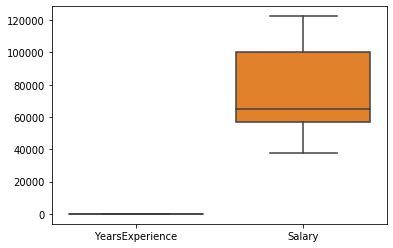

In [4]:
sns.boxplot(data=salary_data)     
plt.show()    # no outliers found

#### Separating out feature & label columns

In [5]:
x_values = salary_data['YearsExperience'].values.reshape(-1,1)
y_values = salary_data['Salary'].values.reshape(-1,1)

#### Plotting experience vs salary

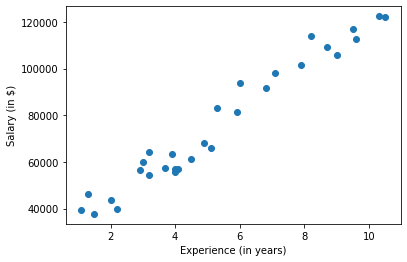

In [6]:
plt.scatter(x=x_values, y=y_values)
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in $)')
plt.show()

#### Splitting dataset into train set & test set

In [7]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size = 0.7, random_state=0) 

### Building linear regression model

In [8]:
regressor = LinearRegression(normalize=True)       # creating object from LinearRegression class
regressor.fit(train_x_values, train_y_values)       # building linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

#### Storing predictions for train set 

In [9]:
train_prediction = regressor.predict(train_x_values)

#### Plotting linear regression model against data points

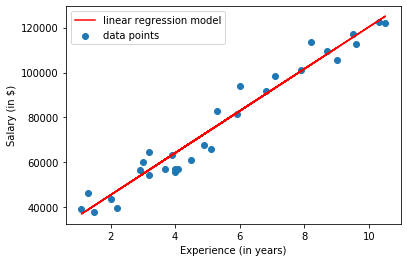

In [10]:
plt.scatter(x=x_values, y=y_values, label= 'data points')
plt.plot(train_x_values,train_prediction, 'red', label= 'linear regression model')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in $)')
plt.legend()
plt.show()

#### Mean absolute error

In [11]:
metrics.mean_absolute_error(train_y_values, train_prediction)

5091.778618459526

### Evaluating model against train set & test set 

In [12]:
accuracy_train = 100 * regressor.score(train_x_values, train_y_values)
accuracy_train

94.2377765219338

In [13]:
accuracy_test = 100 * regressor.score(test_x_values, test_y_values)
accuracy_test

97.4099340721351